In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

face_lib_path = ['C:\\Users\\asiclab06\\Desktop\\PythonWork\\mobilefacenet_pytorch\\build', 'C:\\Users\\asiclab06\\anaconda3\\envs\\ml\\python39.zip', 'C:\\Users\\asiclab06\\anaconda3\\envs\\ml\\DLLs', 'C:\\Users\\asiclab06\\anaconda3\\envs\\ml\\lib', 'C:\\Users\\asiclab06\\anaconda3\\envs\\ml', 'C:\\Users\\asiclab06\\anaconda3\\envs\\ml\\lib\\site-packages', 'C:\\Users\\asiclab06\\anaconda3\\envs\\ml\\lib\\site-packages\\win32', 'C:\\Users\\asiclab06\\anaconda3\\envs\\ml\\lib\\site-packages\\win32\\lib', 'C:\\Users\\asiclab06\\anaconda3\\envs\\ml\\lib\\site-packages\\Pythonwin', 'C:\\Users\\asiclab06\\Desktop\\PythonWork\\mobilefacenet_pytorch']

for p in face_lib_path:
    if p not in sys.path:
        sys.path.append(module_path)

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image

from build.face_lib import *

from model import MobileFaceNet
from mtcnn import MTCNN
from config import get_config
conf = get_config(False)

ModuleNotFoundError: No module named 'nets'

In [4]:
import numpy as np

a = np.load('./s.npy')
b = np.load('./t.npy')

a.shape, b.shape

((1, 512, 1), (1, 512, 3))

In [5]:
a

array([[[ 4.05048504e-02],
        [ 2.61014816e-03],
        [-6.78626448e-02],
        [-1.02407709e-02],
        [-6.00377172e-02],
        [-2.09154356e-02],
        [-1.35889202e-02],
        [-3.26033793e-02],
        [ 2.64850687e-02],
        [-4.46338626e-03],
        [ 1.93233881e-02],
        [-2.38234326e-02],
        [-4.62446921e-02],
        [-5.42617775e-02],
        [-1.27005372e-02],
        [-3.15158181e-02],
        [ 1.08073698e-02],
        [-3.76371108e-02],
        [-2.04647146e-02],
        [-9.07077547e-03],
        [ 4.76759905e-03],
        [ 1.97485071e-02],
        [-3.46229859e-02],
        [-8.91328231e-02],
        [ 1.24718267e-02],
        [-4.80695143e-02],
        [-6.67140931e-02],
        [ 7.81921390e-03],
        [ 9.87346545e-02],
        [-3.25660445e-02],
        [-7.15039298e-02],
        [ 1.32503482e-02],
        [ 4.09484953e-02],
        [ 3.20370011e-02],
        [ 5.04864715e-02],
        [ 4.02246416e-02],
        [-5.84216863e-02],
 

In [2]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, 3, 1, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 1)
        self.conv3 = nn.Sequential(
            nn.Conv2d(32,32,3,1,1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(32 * 8 * 8, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = self.fc(x)
        return x


In [67]:
# 모델을 만들고 임의의 이미지로부터 feature map을 추출
mtcnn = MTCNN()
model = MobileFaceNet(512).eval()
model.load_state_dict(torch.load(r'build/pre_trained/model_mobilefacenet.pth'))
model2 = MobileFaceNet(512).eval()
model2.load_state_dict(torch.load(r'build/pre_trained/mfn_2023-02-02_acc0.9290.pth'))
# oonet = clf_model
# img = torch.rand(1,3, 112, 112)  # 임의의 이미지
img1 = Image.open('build/facebank/id0/Adriana Lima0_0.jpg').convert('RGB')
img2 = Image.open(r'build\facebank\id1\Alex Lawther0_0.jpg').convert('RGB')
# imgs = [img1,img2]
# imgs = [mtcnn.align(img) for img in imgs]
img = mtcnn.align(img1)

c:\Users\asiclab06\Desktop\PythonWork\mobilefacenet_pytorch\mtcnn.py:94: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bounding_boxes = np.array([i for i in bounding_boxes if i is not None])
c:\Users\asiclab06\Desktop\PythonWork\mobilefacenet_pytorch\mtcnn_pytorch\src\matlab_cp2tform.py:90: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)


In [4]:
def temp_feature():
    features = []
    # feature map 추출
    a = None
    for name, layer in model.named_children():
        
        if isinstance(layer, nn.Conv2d):
            img = layer(img)
            features.append((name, img.detach().clone()))
        else:
            img = layer(img)
        

In [9]:
# reference : https://medium.com/the-dl/how-to-use-pytorch-hooks-5041d777f904
class VerboseExecution(nn.Module):
    def __init__(self, model: nn.Module,permute = True):
        super().__init__()
        self.model = model
        self.layer_output = []

        def trans(tensor:torch.Tensor):
            try:
                return tensor.permute(0,2,3,1).data.numpy()
            except:
                return tensor.data.numpy()
        # Register a hook for each layer
        for name, layer in self.model.named_children():
            layer.__name__ = name
            layer.register_forward_hook(
                lambda layer, _, output: print(f"{layer.__name__}: {output.shape}")
            )
            layer.register_forward_hook(
                lambda layer, input, output: self.layer_output.append([layer.__name__,(trans(output) if permute else output)])
            )
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        with torch.no_grad():
            self.model(x)
        return x



In [10]:
verbose_model = VerboseExecution(model)
_ = verbose_model(conf.test_transform(img).unsqueeze(0))

NameError: name 'model' is not defined

In [11]:
out_dict = dict(verbose_model.layer_output)
for k in out_dict.keys():
    print(f"{k} : {out_dict[k].shape} |",end='')

NameError: name 'verbose_model' is not defined

In [12]:
def plot_feature_map(instance,col=8,fig_size=(12,10),use_title=False):
    # num_features = out_dict['conv1'][0].shape[-1]
    num_features =instance.shape[-1]
    row = int(num_features / col) +1

    fig = plt.figure(figsize=fig_size)
    for i in range(1,num_features+1):
        ax = fig.add_subplot(row,col,i)
        ax.imshow(instance[:,:,i-1])
        ax.axis(False)
    if use_title:
        fig.suptitle(f"{num_features} features {i} block",fontsize=42)
        fig.tight_layout()
        

In [7]:
def all_plot_feature(dic:dict,use_title=False):
    for key in dic.keys():
        if 'conv' in key and 'flatten' not in key:
            plot_feature_map(dic[key][0],10,use_title=use_title)


# mobilefacenet : 배포된 pre_trained model

In [8]:
all_plot_feature(out_dict,True)

NameError: name 'out_dict' is not defined

In [90]:
from torchvision import utils
# https://stackoverflow.com/questions/55594969/how-to-visualise-filters-in-a-cnn-with-pytorch

def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
        if type(tensor) == np.ndarray:
                tensor = torch.from_numpy(tensor)
        n,c,w,h = tensor.shape

        if allkernels: tensor = tensor.view(n*c, -1, w, h)
        elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

        rows = np.min((tensor.shape[0] // nrow + 1, 64))    
        grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
        plt.figure( figsize=(nrow,rows) )
        plt.imshow(grid.numpy().transpose((1, 2, 0)))


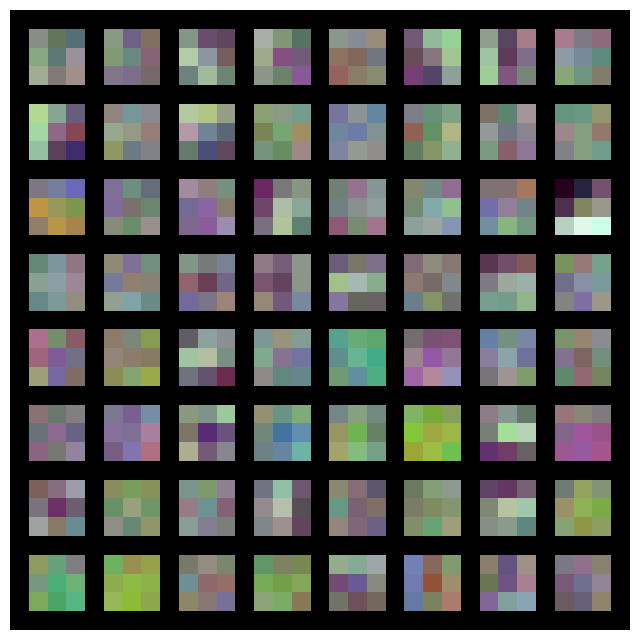

In [106]:
filters = [i for i in model.conv1.children()][0].weight.data.clone()

visTensor(filters, ch=0, allkernels=False)

plt.axis('off')
plt.ioff()
plt.show()

# mobilefacenet : vgg2 직접 학습한 모델

conv1: torch.Size([1, 64, 56, 56])
conv2_dw: torch.Size([1, 64, 56, 56])
conv_23: torch.Size([1, 64, 28, 28])
conv_3: torch.Size([1, 64, 28, 28])
conv_34: torch.Size([1, 128, 14, 14])
conv_4: torch.Size([1, 128, 14, 14])
conv_45: torch.Size([1, 128, 7, 7])
conv_5: torch.Size([1, 128, 7, 7])
conv_6_sep: torch.Size([1, 512, 7, 7])
conv_6_dw: torch.Size([1, 512, 1, 1])
conv_6_flatten: torch.Size([1, 512])
linear: torch.Size([1, 512])
bn: torch.Size([1, 512])


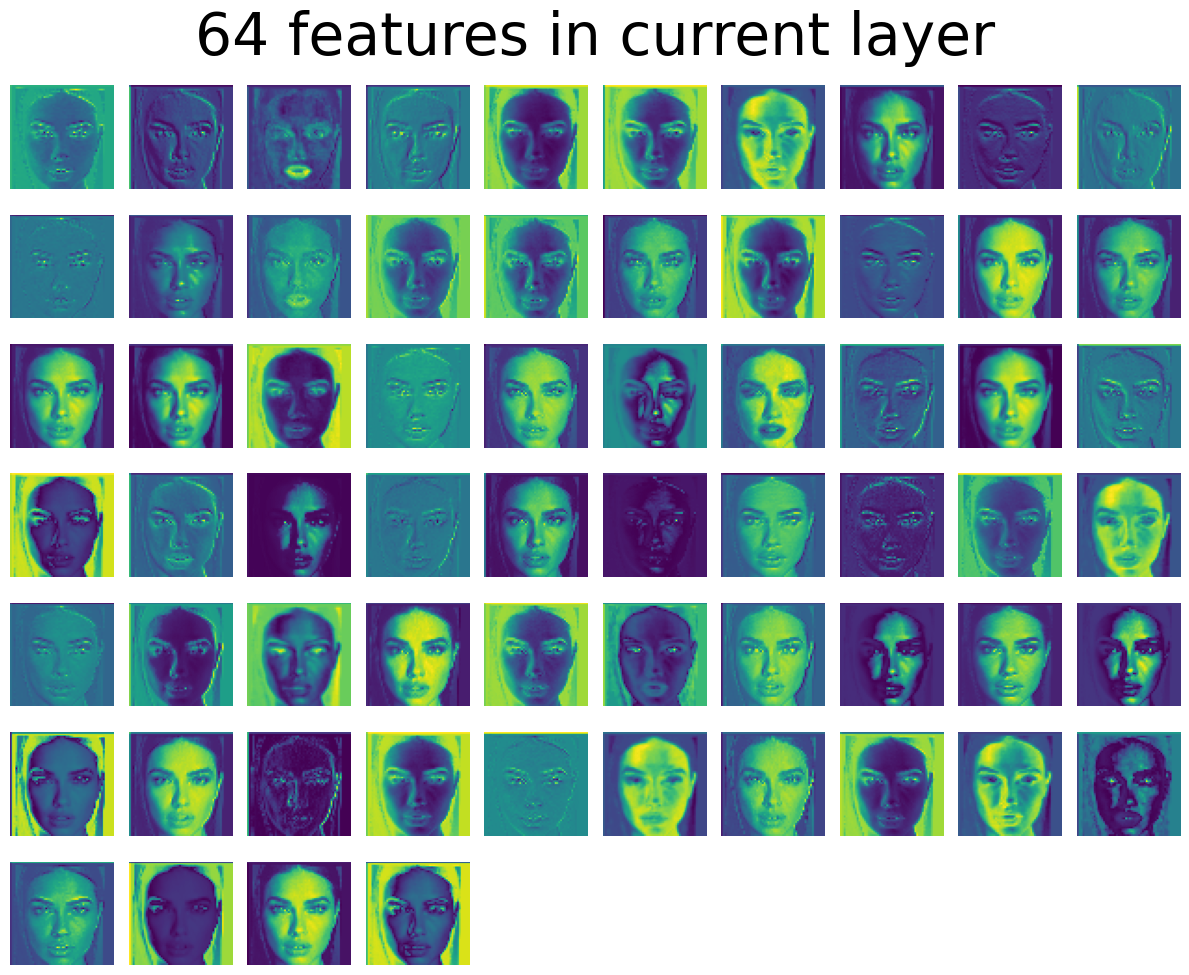

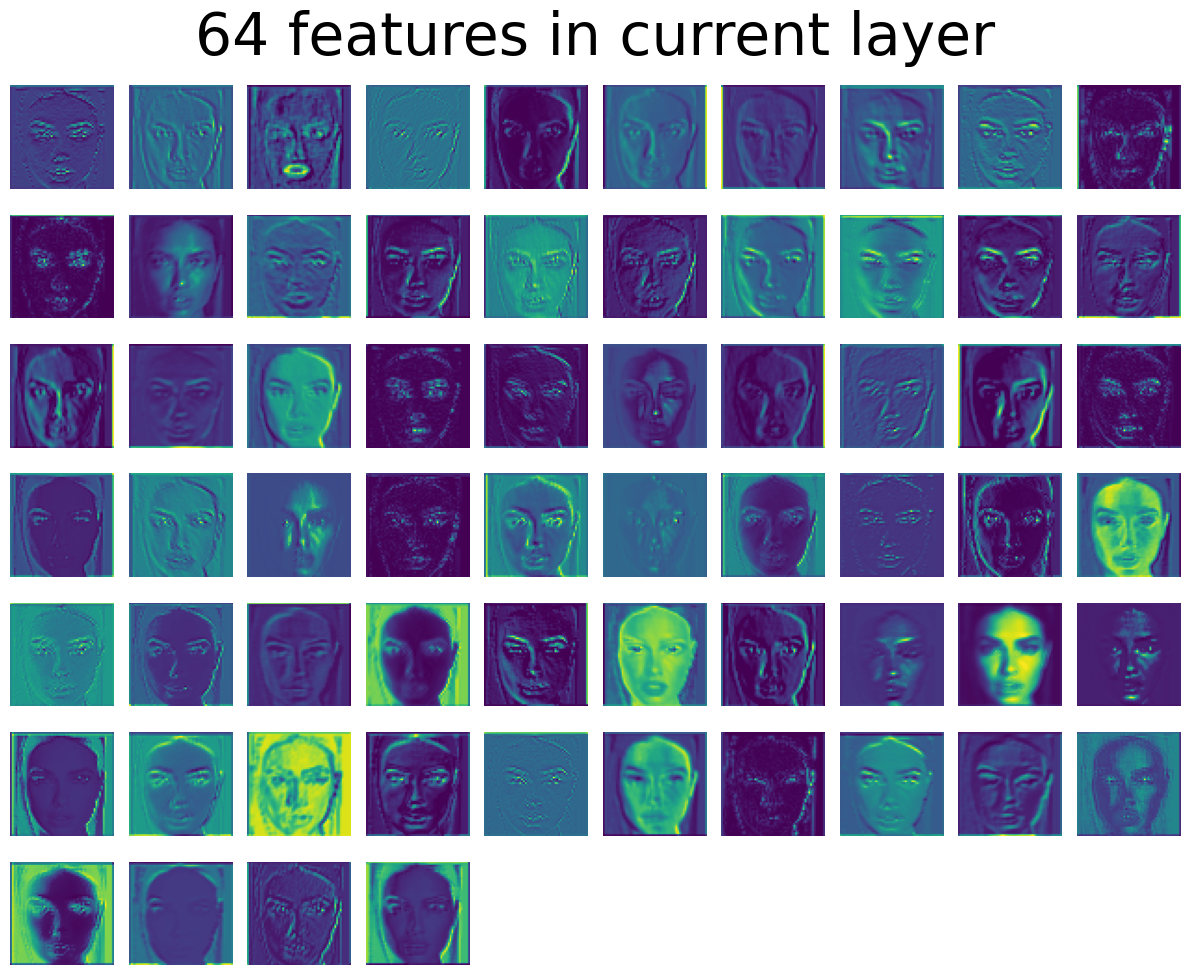

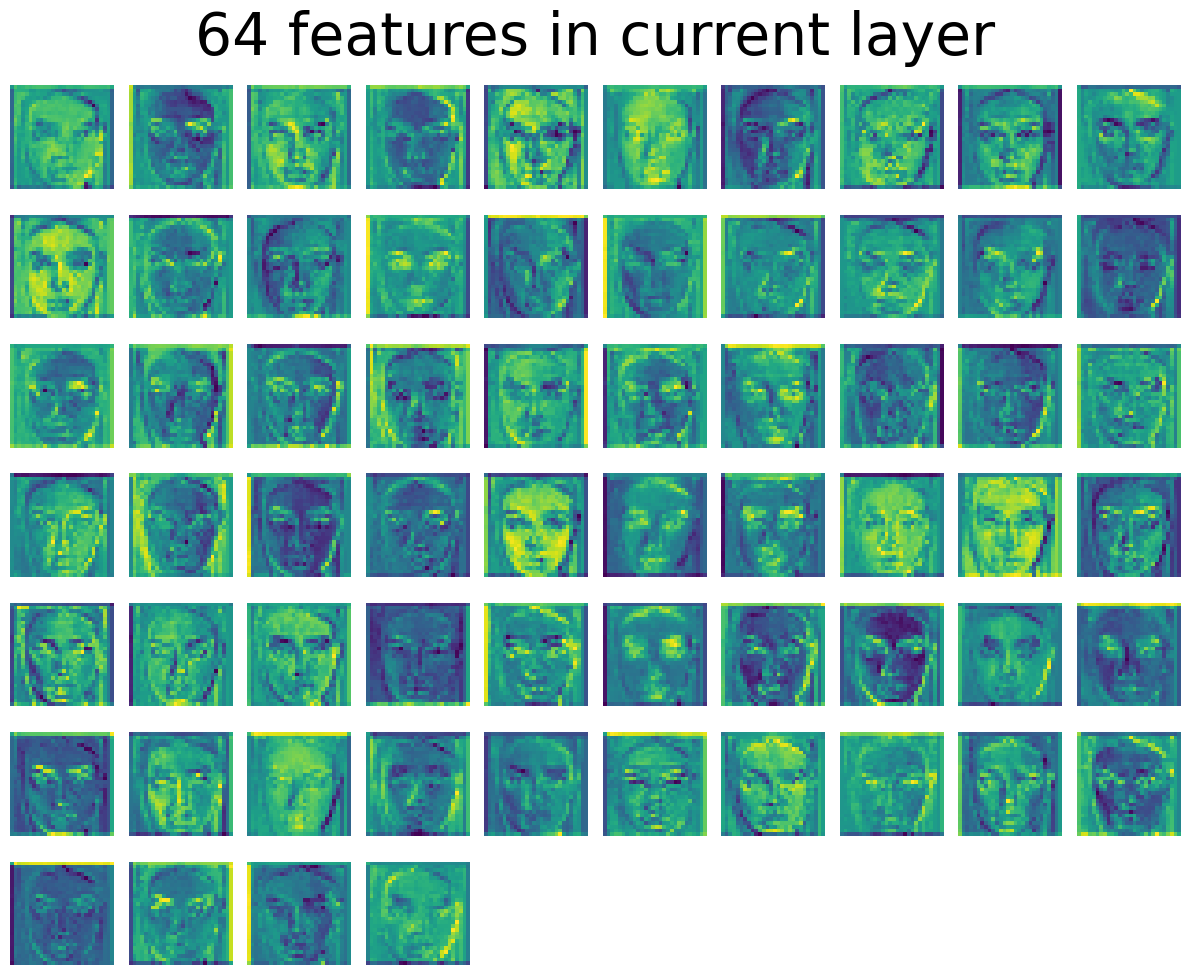

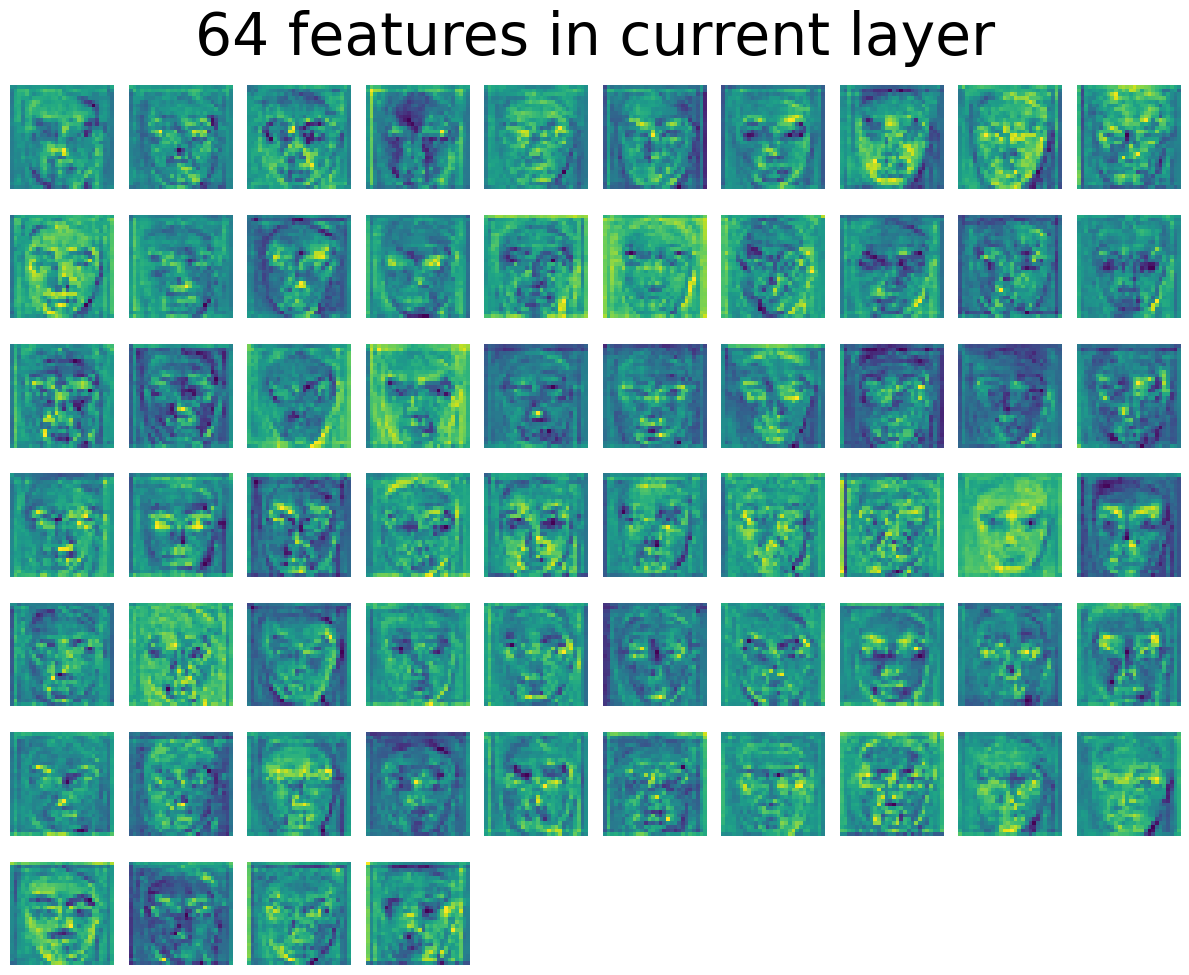

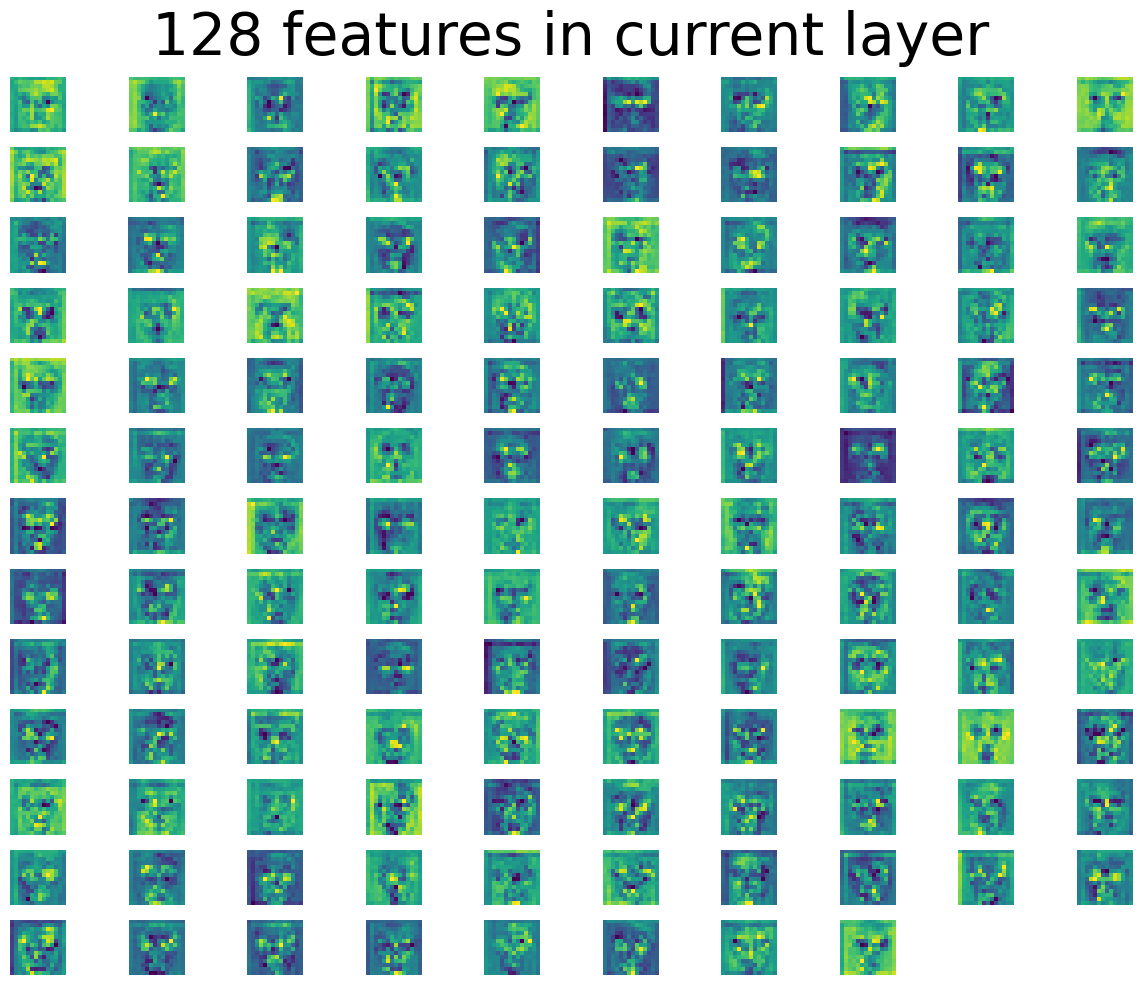

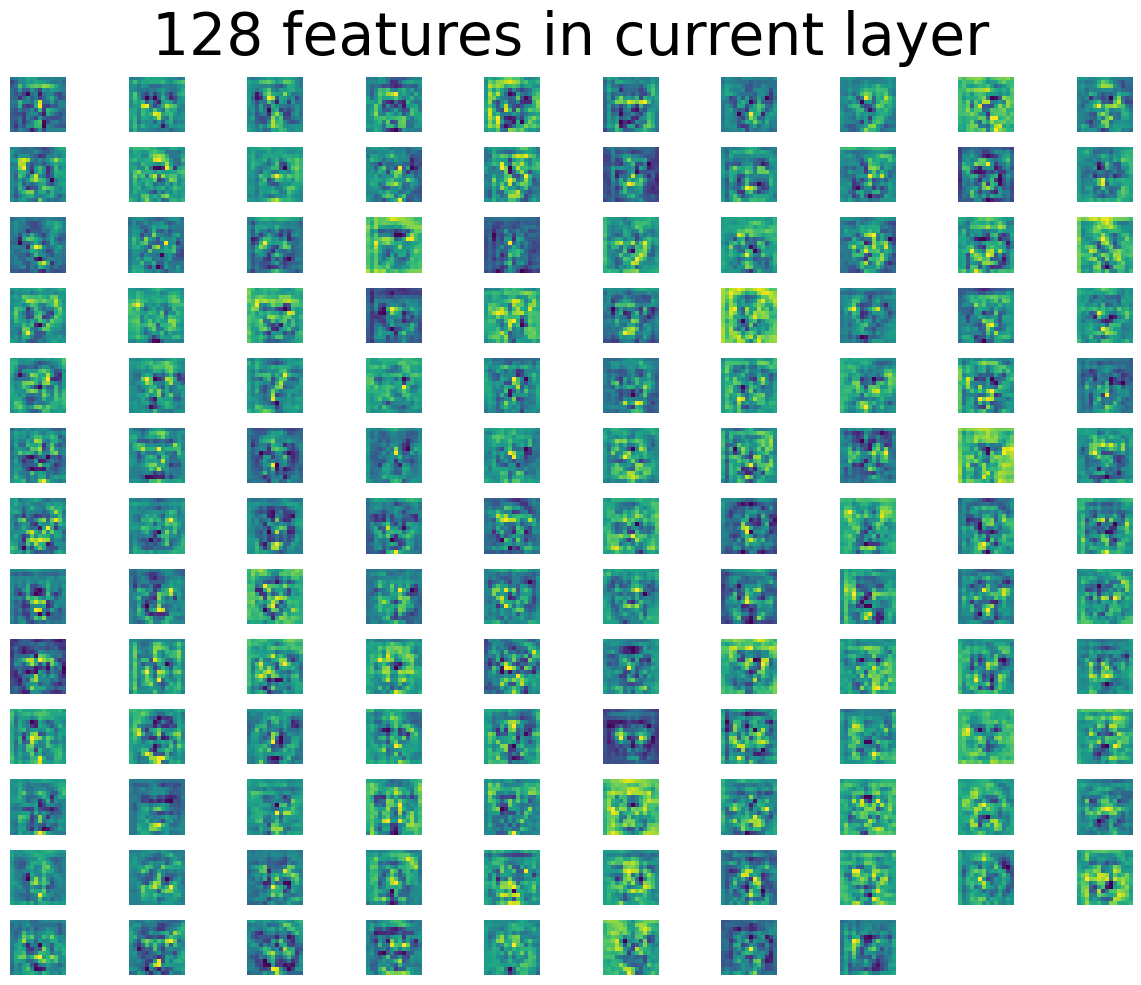

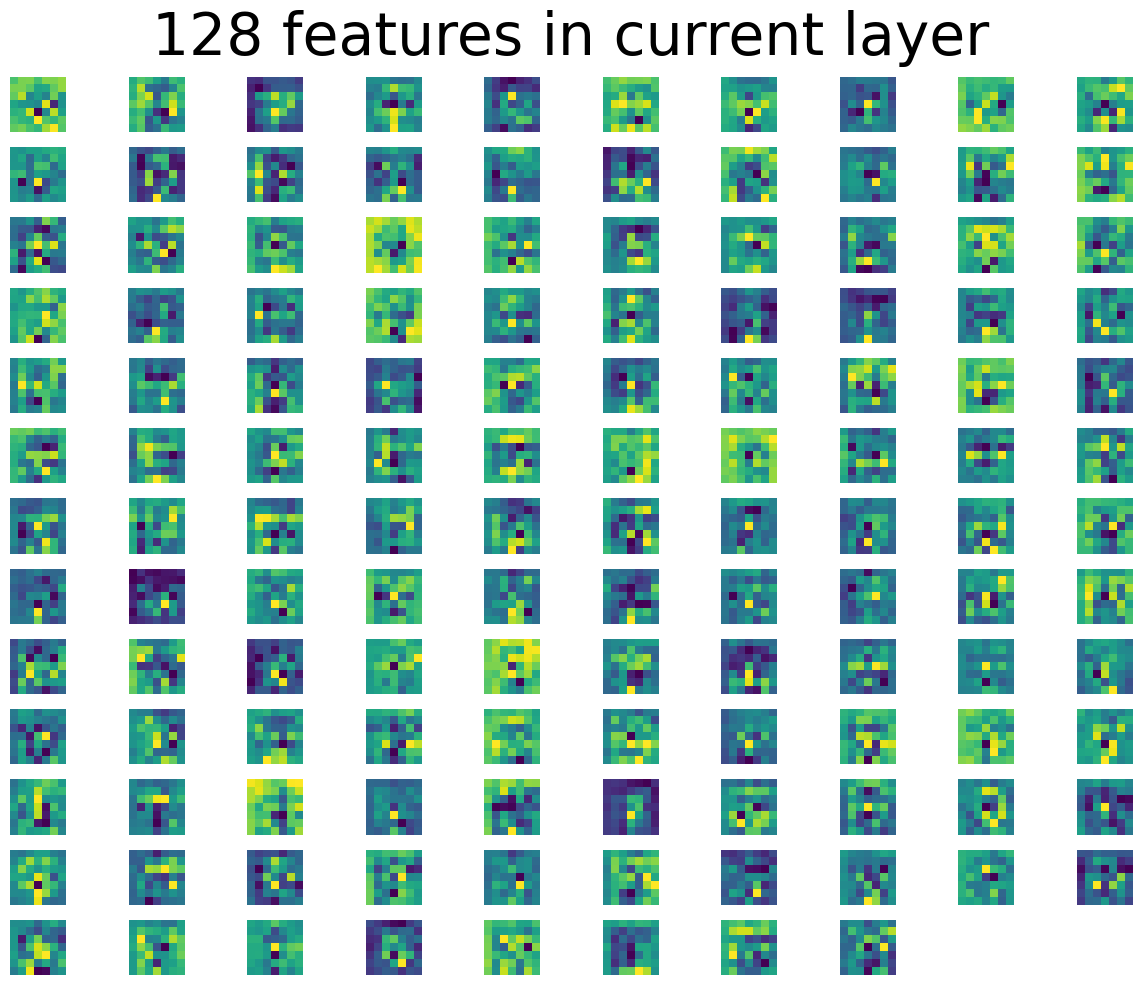

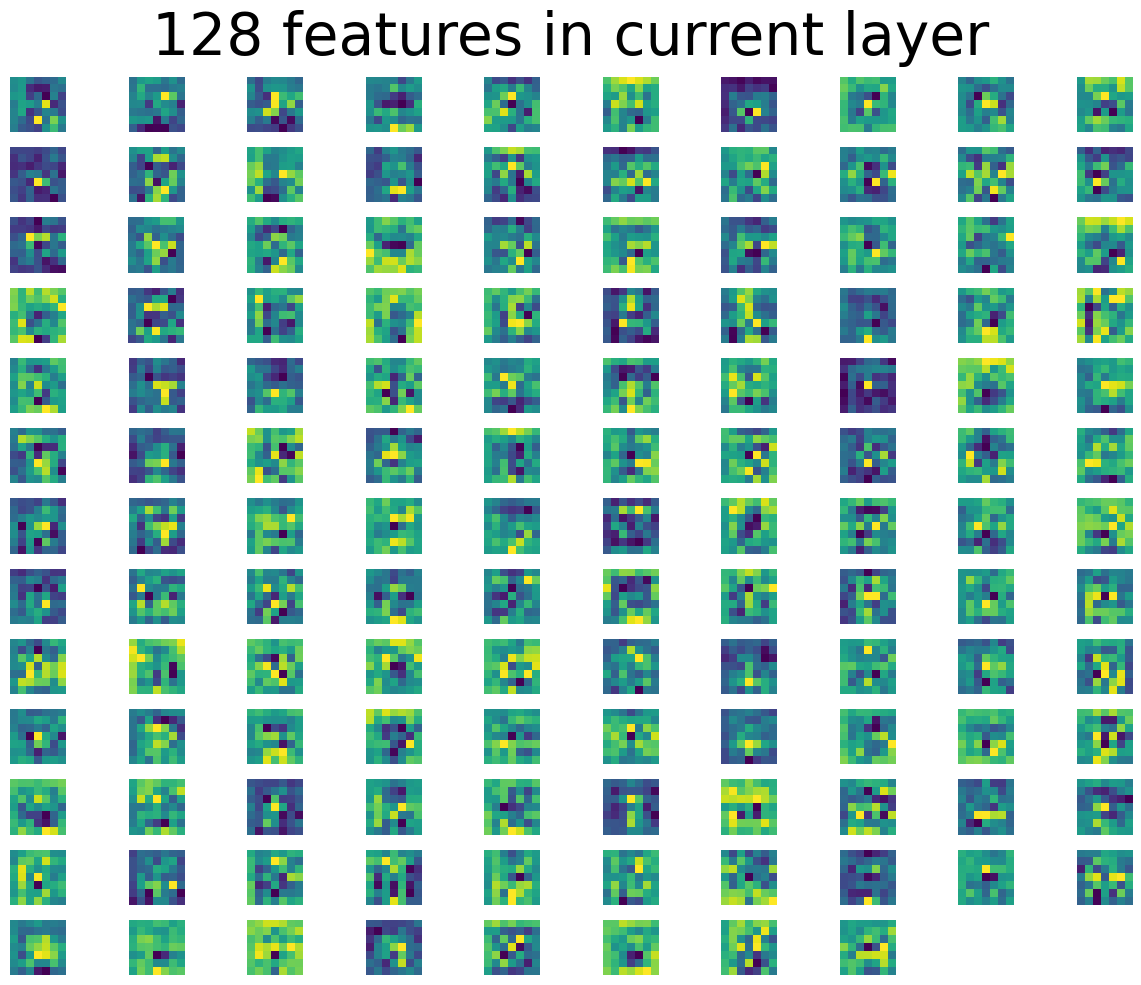

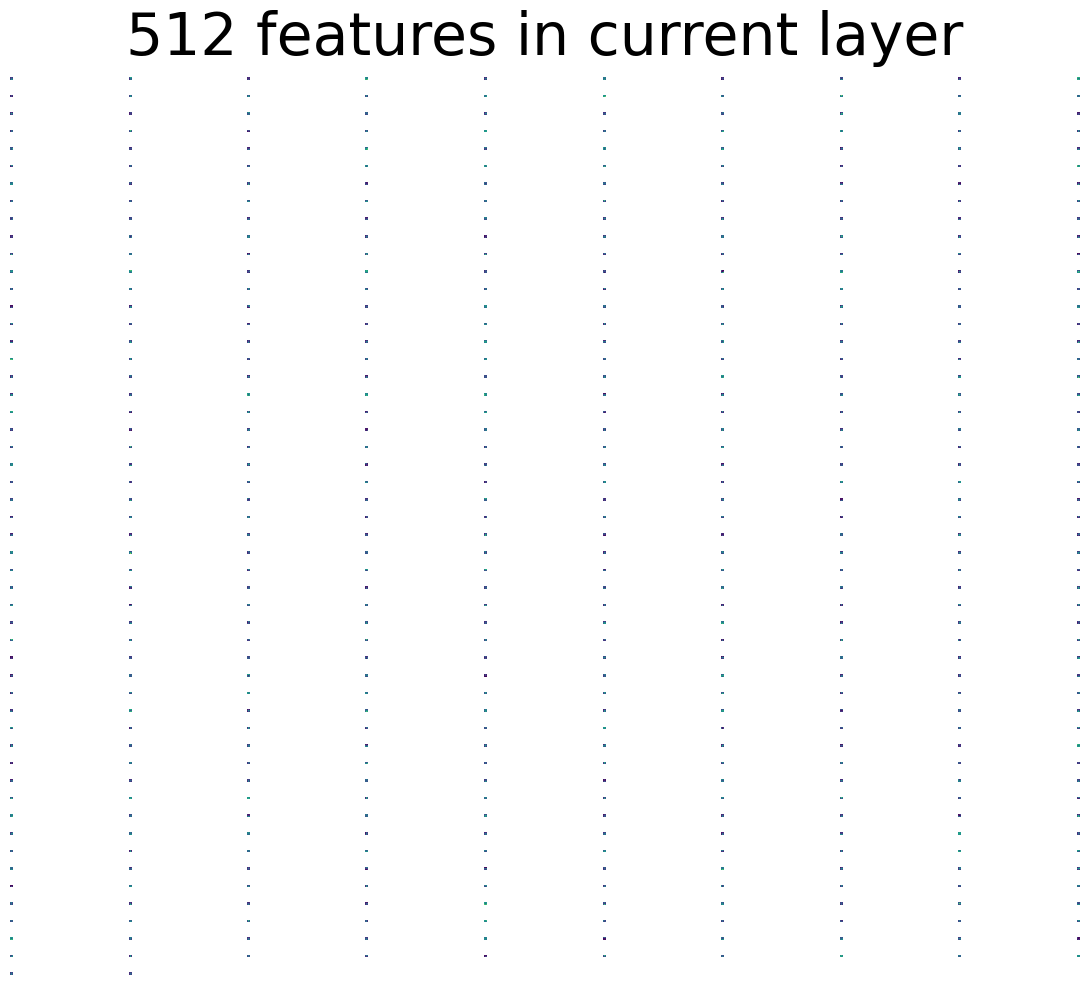

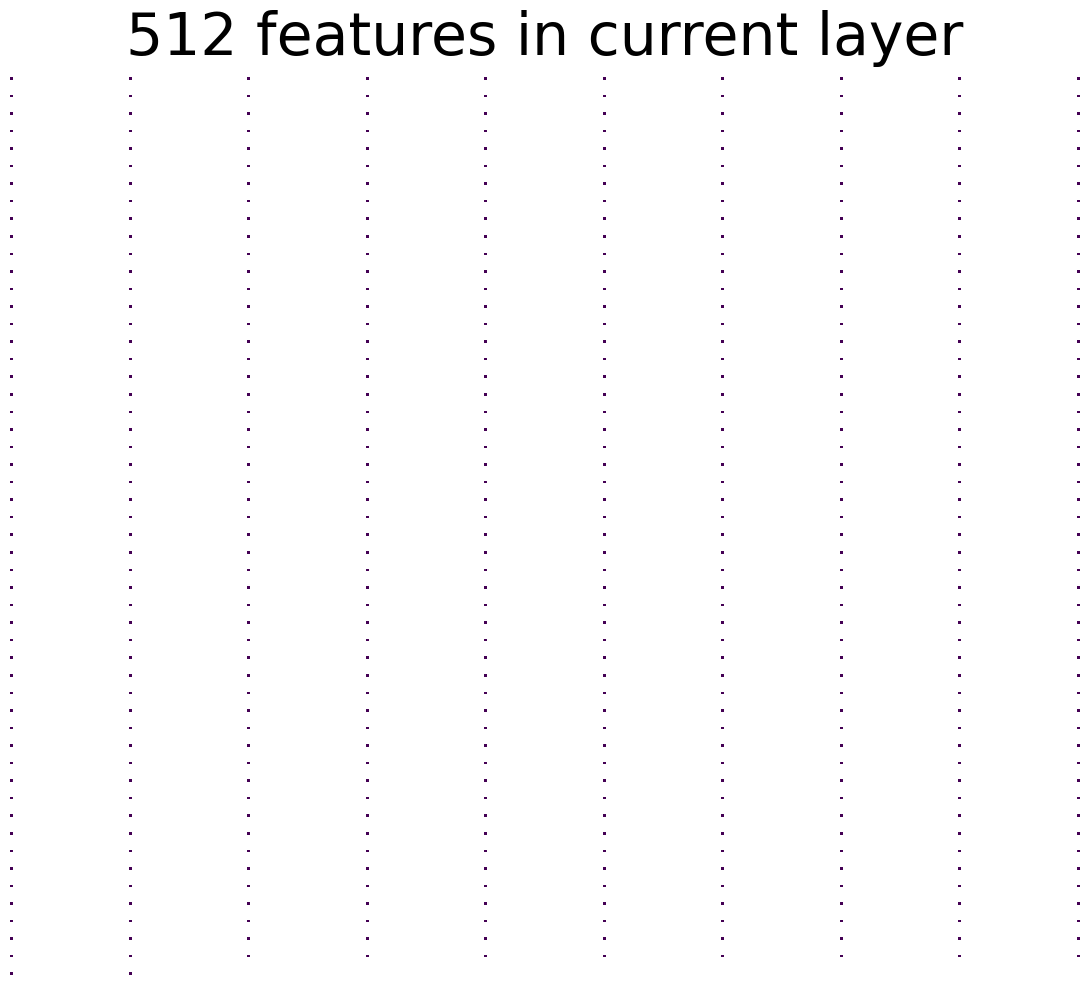

In [68]:
verbose_model = VerboseExecution(model2)
_ = verbose_model(conf.test_transform(img).unsqueeze(0))
out_dict_2 = dict(verbose_model.layer_output)
all_plot_feature(out_dict_2,True)

# custome fcn classifyer


features: torch.Size([1, 128, 22, 22])
features: torch.Size([1, 128, 22, 22])
features: torch.Size([1, 128, 22, 22])
features: torch.Size([1, 128, 22, 22])
features: torch.Size([1, 128, 22, 22])
features: torch.Size([1, 128, 22, 22])
features: torch.Size([1, 128, 22, 22])
features: torch.Size([1, 128, 22, 22])
features: torch.Size([1, 128, 22, 22])
features: torch.Size([1, 128, 22, 22])
features: torch.Size([1, 128, 22, 22])
features: torch.Size([1, 128, 22, 22])
clf1: torch.Size([1, 64, 11, 11])
clf1: torch.Size([1, 64, 11, 11])
clf1: torch.Size([1, 64, 11, 11])
clf1: torch.Size([1, 64, 11, 11])
clf1: torch.Size([1, 64, 11, 11])
clf1: torch.Size([1, 64, 11, 11])
clf1: torch.Size([1, 64, 11, 11])
clf1: torch.Size([1, 64, 11, 11])
clf1: torch.Size([1, 64, 11, 11])
clf1: torch.Size([1, 64, 11, 11])
clf1: torch.Size([1, 64, 11, 11])
clf1: torch.Size([1, 64, 11, 11])
clf2: torch.Size([1, 3, 6, 6])
clf2: torch.Size([1, 3, 6, 6])
clf2: torch.Size([1, 3, 6, 6])
clf2: torch.Size([1, 3, 6, 6])


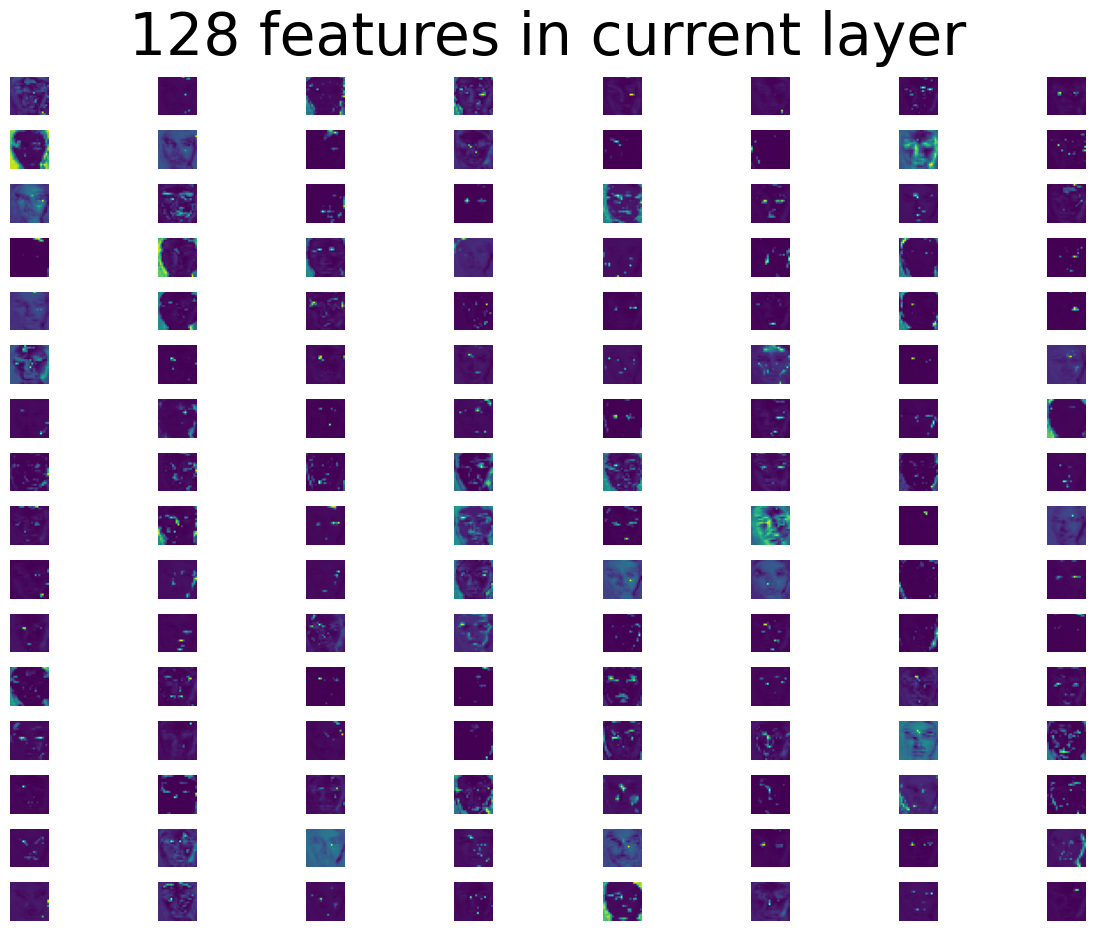

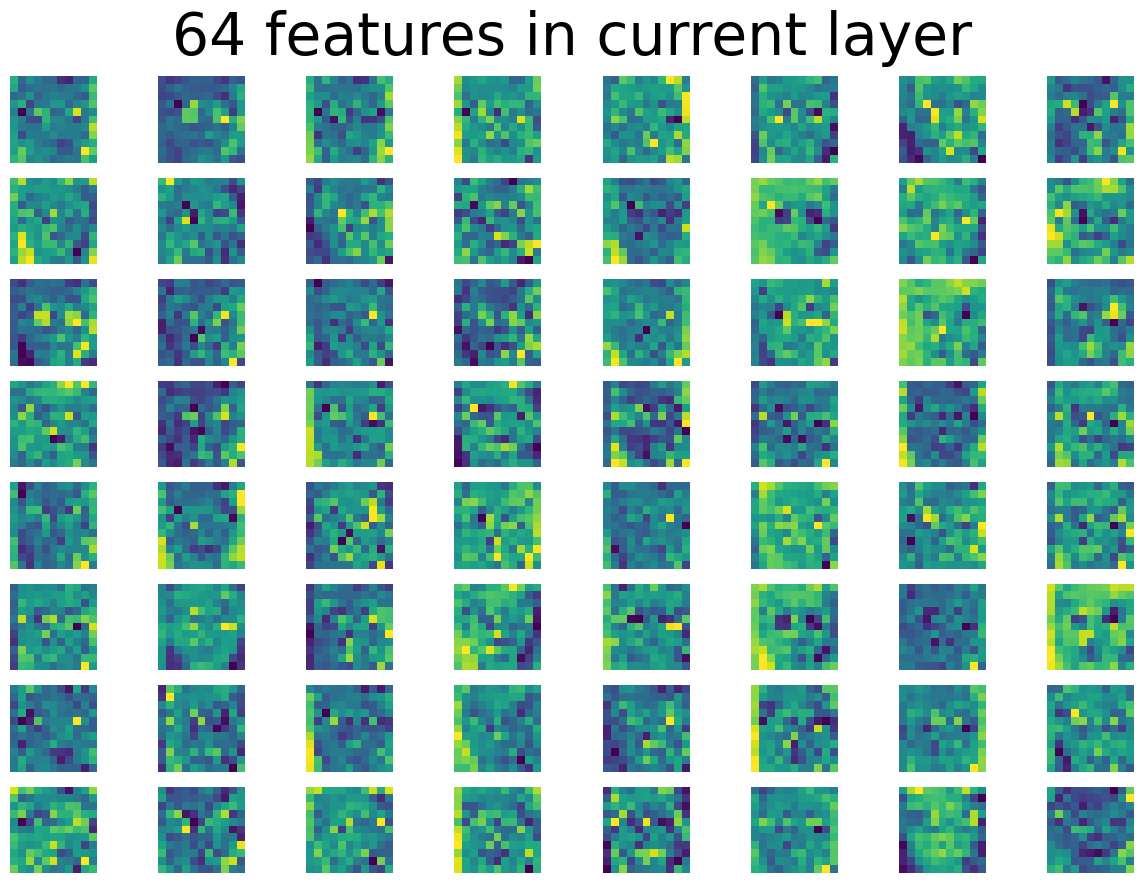

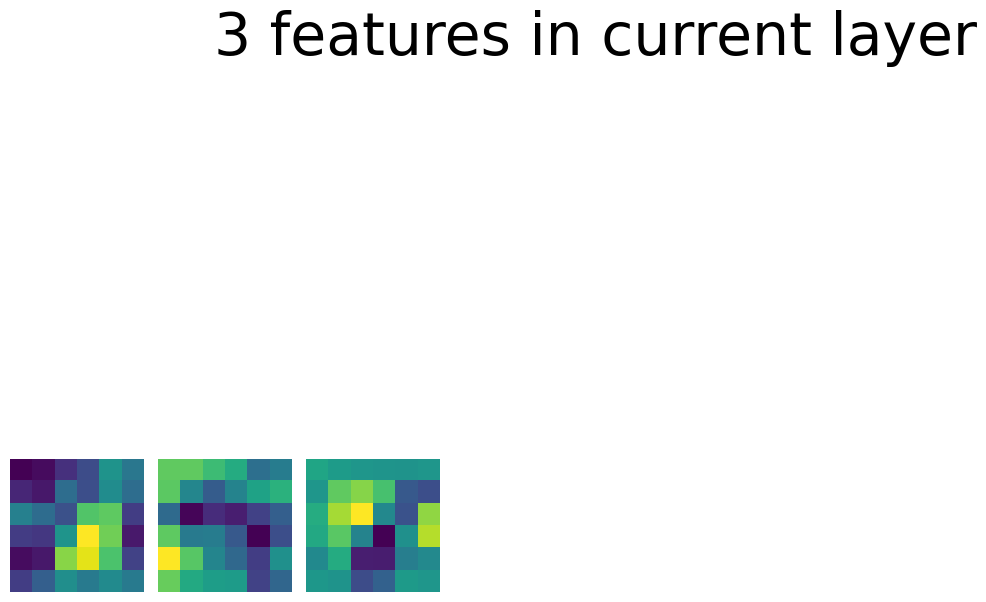

In [66]:
from torchvision import transforms as trans

test_transform = trans.Compose([
                    trans.ToTensor(),
                    trans.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
                ])
                
verbose_model = VerboseExecution(clf_model.cpu())
_ = verbose_model(test_transform(img1.resize((196,196))).unsqueeze(0))
out_dict2 = dict(verbose_model.layer_output)

print(out_dict2.keys())
plot_feature_map(out_dict2['features'][0],use_title=True)
plot_feature_map(out_dict2['clf1'][0],use_title=True)
plot_feature_map(out_dict2['clf2'][0],use_title=True)

# MTCNN PNet

In [56]:
test_transform = trans.Compose([
                    trans.ToTensor(),
                    trans.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
                ])
                
verbose_model = VerboseExecution(mtcnn.pnet.cpu())
_ = verbose_model(test_transform(img1.resize((196,196))).unsqueeze(0))
out_dict2 = dict(verbose_model.layer_output)

print(out_dict2.keys())

features: torch.Size([1, 32, 93, 93])
conv4_1: torch.Size([1, 2, 93, 93])
conv4_2: torch.Size([1, 4, 93, 93])
dict_keys(['features', 'conv4_1', 'conv4_2'])


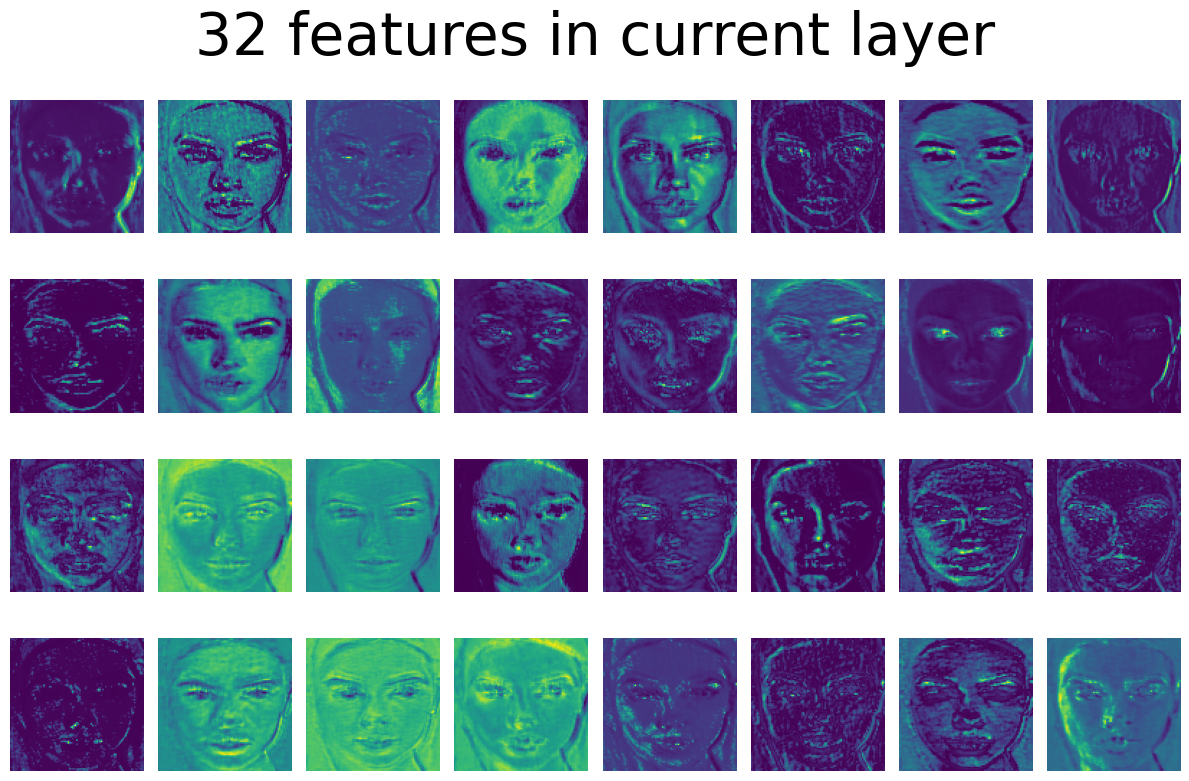

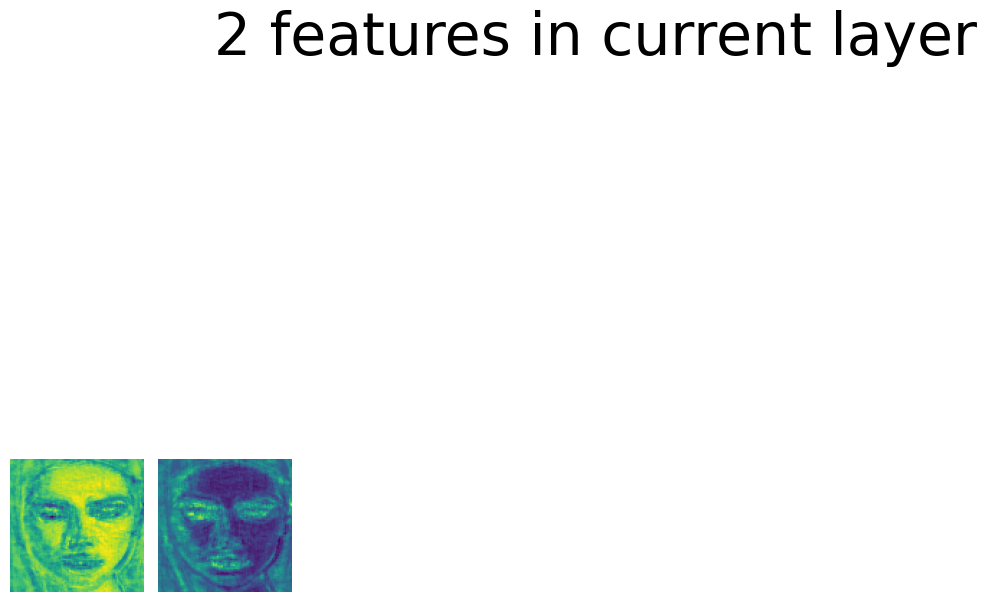

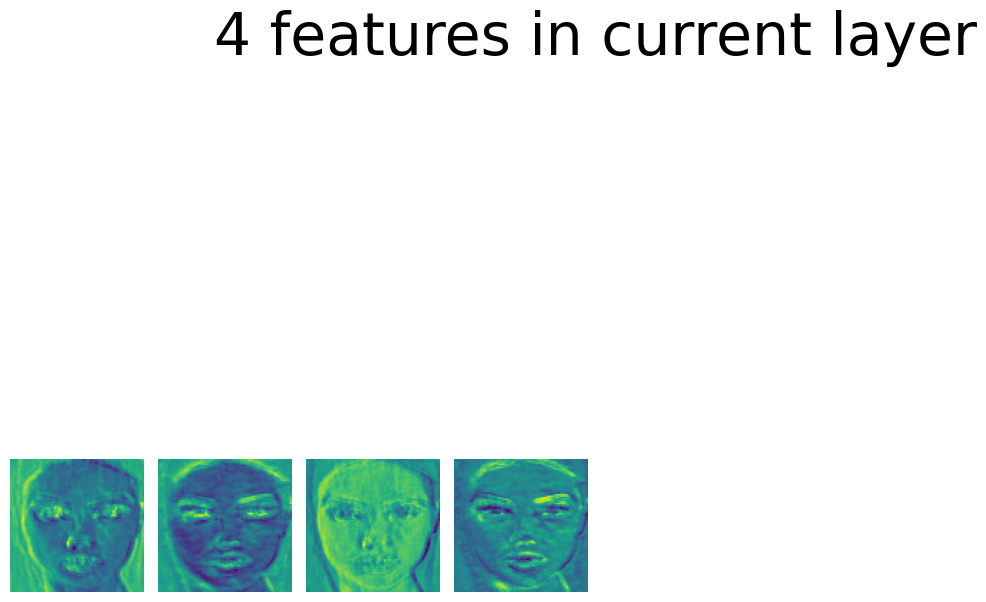

In [65]:
plot_feature_map(out_dict2['features'][0],use_title=True)
plot_feature_map(out_dict2['conv4_1'][0],use_title=True)
plot_feature_map(out_dict2['conv4_2'][0],use_title=True)


# Original Arcface model 50 : pre_trained model

In [72]:
from model import Backbone

resnet = Backbone(50,0.2,'ir_se').eval()
resnet.load_state_dict(torch.load('./build/pre_trained/model_ir_se50.pth'))
test_transform = trans.Compose([
                    trans.ToTensor(),
                    trans.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
                ])
verbose_model = VerboseExecution(resnet)
_ = verbose_model(conf.test_transform(img).unsqueeze(0))
out_dict_res = dict(verbose_model.layer_output)

input_layer: torch.Size([1, 64, 112, 112])
body: torch.Size([1, 512, 7, 7])
output_layer: torch.Size([1, 512])


C:\Users\asiclab06\AppData\Local\Temp\ipykernel_7176\2820888995.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


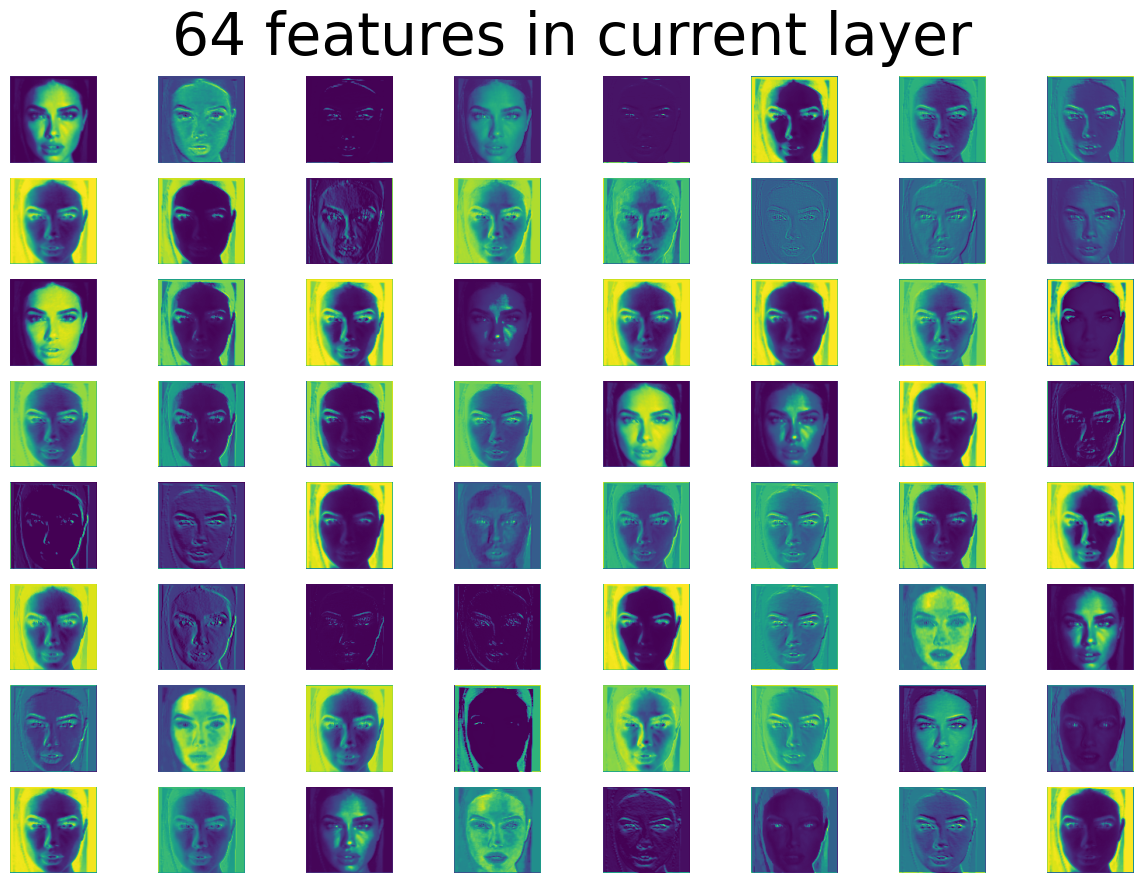

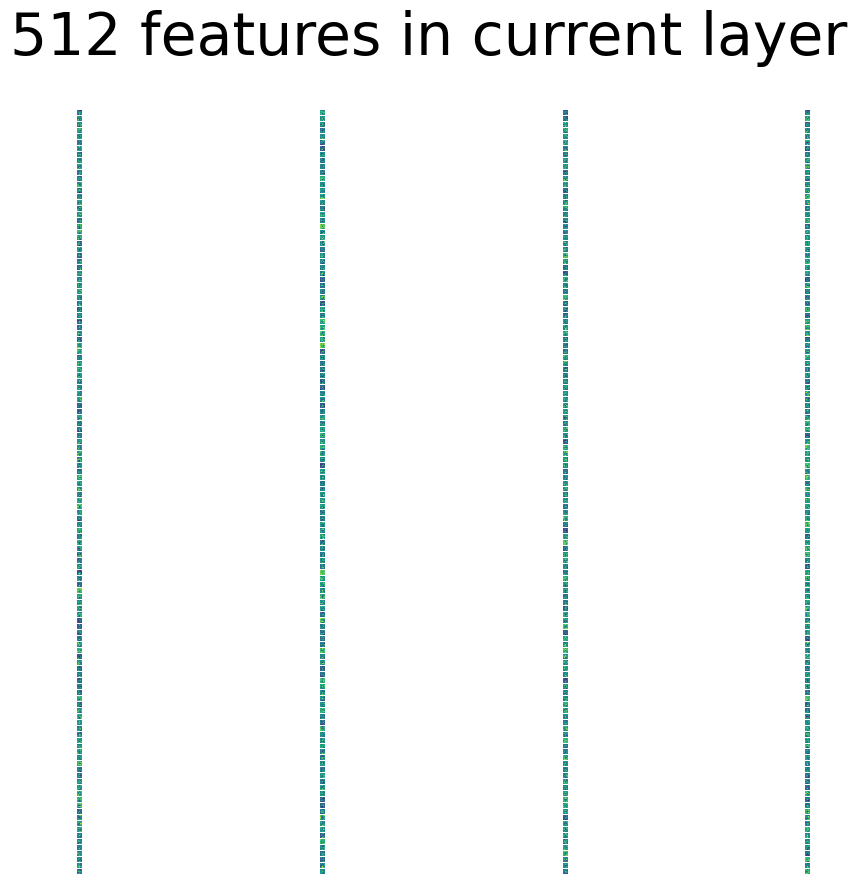

In [75]:
plot_feature_map(out_dict_res['input_layer'][0],use_title=True)
plot_feature_map(out_dict_res['body'][0],use_title=True,col=4)

In [69]:
from typing import Dict, Iterable, Callable

class FeatureExtractor(nn.Module):
    def __init__(self, model: nn.Module, layers: Iterable[str]):
        super().__init__()
        self.model = model
        self.layers = layers
        self._features = {layer: torch.empty(0) for layer in layers}

        for layer_id in layers:
            layer = dict([*self.model.named_modules()])[layer_id]
            layer.register_forward_hook(self.save_outputs_hook(layer_id))

    def save_outputs_hook(self, layer_id: str) -> Callable:
        def fn(_, __, output):
            self._features[layer_id] = output
        return fn

    def forward(self, x: torch.Tensor) -> Dict[str, torch.Tensor]:
        _ = self.model(x)
        return self._features